In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dataset = 'vd'
MAE_k = 1
MSE_k = 0

# MAE
os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\성능\진짜\MAE_data')
df_val_MAE = pd.read_csv('result_val_' + dataset + f'_{MAE_k}.csv')
df_test_MAE = pd.read_csv('result_test_' + dataset + '.csv')

# MSE
os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\성능\진짜\MSE_data')
df_val_MSE = pd.read_csv('result_val_' + dataset + f'_{MSE_k}.csv')
df_test_MSE = pd.read_csv('result_test_' + dataset + '.csv')

print(df_val_MAE.shape[1])
print(df_val_MSE.shape[1])

3
3


In [5]:
# MAE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_val_MAE.shape[1]-1)]
df_val_MAE.columns = columns

columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MAE.shape[1]-1)]
df_test_MAE.columns = columns

# MSE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_val_MSE.shape[1]-1)]
df_val_MSE.columns = columns

columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MSE.shape[1]-1)]
df_test_MSE.columns = columns


# Scatter plot (MAE) - 외적 - Val

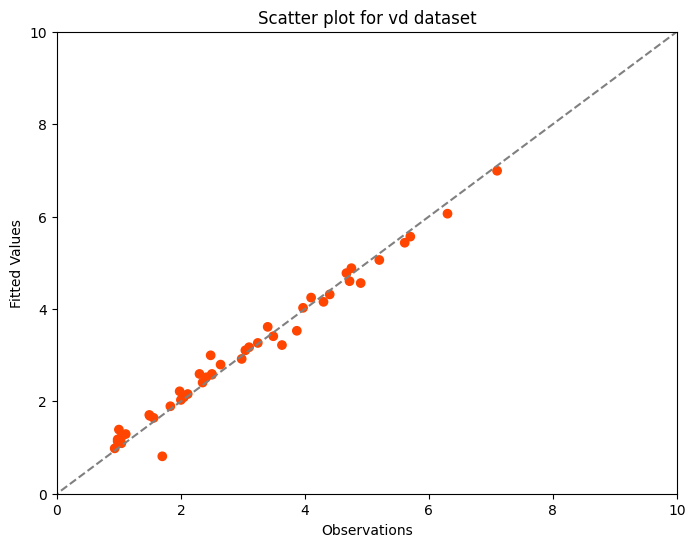

In [8]:
from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])
pastel_cmap = ListedColormap(["#FF4500"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_val_MAE['target'], df_val_MAE['fitted'],
                      c=df_val_MAE['target'],
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_val_MAE['target'].min(), df_val_MAE['fitted'].min()) - 20
max_val = max(df_val_MAE['target'].max(), df_val_MAE['fitted'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# vd
plt.xlim(0, 10)
plt.ylim(0, 10)

# # esol
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # freesolv
# plt.xlim(-10, 5)
# plt.ylim(-10, 5)

# # lipo
# plt.xlim(-5, 8)
# plt.ylim(-5, 8)

# # pdbbind
# plt.xlim(-4, 16)
# plt.ylim(-4, 16)

plt.xlabel("Observations")
plt.ylabel("Fitted Values")
plt.title(f"Scatter plot for {dataset} dataset")

# 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\scatter_plot_outer')
# plt.savefig(f'result_{dataset}_scatter_val_MAE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Scatter plot (MAE) - 외적 - Test

In [4]:
from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_test_MAE['pred'], df_test_MAE['target'],
                      c=df_test_MAE['target'], s = 17,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_test_MAE['target'].min(), df_test_MAE['pred'].min()) - 20
max_val = max(df_test_MAE['target'].max(), df_test_MAE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

# legend_labels = ['Ours']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# vd
plt.xlim(0, 10)
plt.ylim(0, 10)

# # esol
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # freesolv
# plt.xlim(-10, 5)
# plt.ylim(-10, 5)

# # lipo
# plt.xlim(-5, 8)
# plt.ylim(-5, 8)

# # pdbbind
# plt.xlim(-4, 16)
# plt.ylim(-4, 16)

plt.xlabel("Predicted Values", fontweight='bold')
plt.ylabel("Observations", fontweight='bold')
plt.xticks(range(-10,5, 3))
plt.yticks(range(-10,5, 3))
plt.grid(alpha = 0.2)
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\scatter_plot_outer')
# plt.savefig(f'result_{dataset}_scatter_test_MAE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

NameError: name 'df_test_MAE' is not defined

<Figure size 800x600 with 0 Axes>

# Scatter plot (MSE) - 외적 - Val

In [27]:
# from matplotlib.colors import ListedColormap
# # pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])
# pastel_cmap = ListedColormap(["black"])

# plt.figure(figsize = (8, 6))

# scatter = plt.scatter(df_val_MSE['target'], df_val_MSE['fitted'],
#                       c=df_val_MSE['target'], s = 15,
#                       cmap = pastel_cmap)

# # 대각선 추가
# min_val = min(df_val_MSE['target'].min(), df_val_MSE['fitted'].min()) - 20
# max_val = max(df_val_MSE['target'].max(), df_val_MSE['fitted'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# # legend_labels = ['Ours']
# # legend_handles = scatter.legend_elements()[0]
# # plt.legend(legend_handles, legend_labels)

# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # # lipo
# # plt.xlim(-5, 8)
# # plt.ylim(-5, 8)

# # # pdbbind
# # plt.xlim(-4, 16)
# # plt.ylim(-4, 16)

# plt.xlabel("Observations")
# plt.ylabel("Fitted Values")
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\scatter_plot_outer')
# plt.savefig(f'result_{dataset}_scatter_val_MSE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# Scatter plot (MSE) - 외적 - test

In [5]:
dataset = 'vd'
MSE_k = 0

# MSE
os.chdir(r'C:\Programming\Github\EGCN')
df_test_MSE = pd.read_csv('result_test.csv')

columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MSE.shape[1]-1)]
df_test_MSE.columns = columns



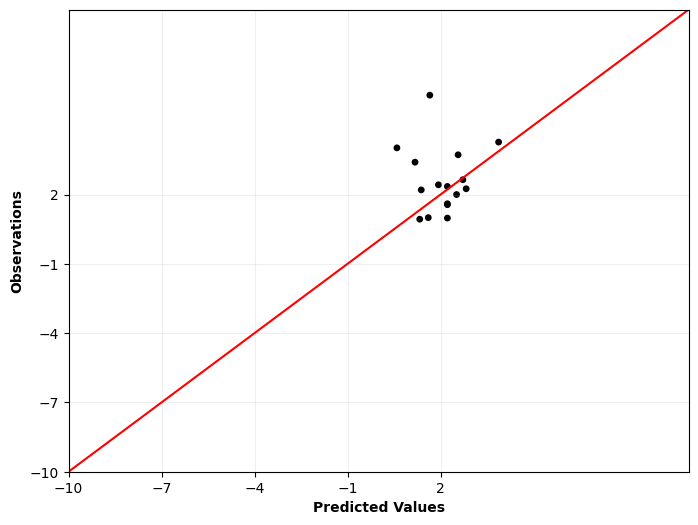

In [6]:
from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_test_MSE['pred'], df_test_MSE['target'],
                      c=df_test_MSE['target'], s=15,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_test_MSE['target'].min(), df_test_MSE['pred'].min()) - 20
max_val = max(df_test_MSE['target'].max(), df_test_MSE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

# legend_labels = ['Ours']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# vd
plt.xlim(0, 10)
plt.ylim(0, 10)

# # esol
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # freesolv
# plt.xlim(-10, 5)
# plt.ylim(-10, 5)


# # lipo
# plt.xlim(-5, 8)
# plt.ylim(-5, 8)

# # pdbbind
# plt.xlim(-4, 16)
# plt.ylim(-4, 16)

plt.xlabel("Predicted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')
plt.xticks(range(-10,5, 3))
plt.yticks(range(-10,5, 3))

plt.grid(alpha = 0.2)
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\scatter_plot_outer')
# plt.savefig(f'result_{dataset}_scatter_test_MSE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# training 

In [29]:
# columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer_train_MSE.shape[1]-1)]
# df_outer_train_MSE.columns = columns

# from matplotlib.colors import ListedColormap
# #pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_outer_train_MSE['target'], df_outer_train_MSE['pred'])

# # 대각선 추가
# min_val = min(df_outer_train_MSE['target'].min(), df_outer_train_MSE['pred'].min()) - 20
# max_val = max(df_outer_train_MSE['target'].max(), df_outer_train_MSE['pred'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# # legend_labels = ['Ours']
# # legend_handles = scatter.legend_elements()[0]
# # plt.legend(legend_handles, legend_labels)

# plt.show()

# Scatter plot (MAE) - 2개 comb

In [30]:
# df_outer_MAE['source'] = 'outer'
# df_egcn_MAE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MAE, df_egcn_MAE], ignore_index = True)

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['target'], df_combined['pred'],
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 대각선 추가
# min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 20
# max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # # lipo
# # plt.xlim(-5, 8)
# # plt.ylim(-5, 8)

# # # pdbbind
# # plt.xlim(-4, 16)
# # plt.ylim(-4, 16)

# plt.xlabel("Target Value")
# plt.ylabel("Predicted Value")
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
# plt.savefig(f'result_{dataset}_scatter_MAE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# Scatter plot (MSE) - 2개 comb

In [31]:
# df_outer_MSE['source'] = 'outer'
# df_egcn_MSE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MSE, df_egcn_MSE], ignore_index = True)

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['target'], df_combined['pred'],
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 대각선 추가
# min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 20
# max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)


# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # # lipo
# # plt.xlim(-5, 8)
# # plt.ylim(-5, 8)

# # # pdbbind
# # plt.xlim(-4, 16)
# # plt.ylim(-4, 16)

# plt.xlabel("Target Value")
# plt.ylabel("Predicted Value")
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
# plt.savefig(f'result_{dataset}_scatter_MSE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# Loss Function

In [ ]:
# MAE
# loss function용 dataset
os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\성능\진짜\MAE_data')
loss_MAE = pd.read_csv('Loss_' + dataset + '.csv')

print(loss_MAE)
print(type(loss_MAE['Train Loss'][0]))

# str형 리스트를 리스트 타입으로 변경
import ast
loss_MAE['Train Loss'] = loss_MAE['Train Loss'].apply(ast.literal_eval)

print(loss_MAE)
print(type(loss_MAE['Train Loss'][0]))


# MSE
# loss function용 dataset
os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\성능\진짜\MSE_data')
loss_MSE = pd.read_csv('Loss_' + dataset + '.csv')

print(loss_MSE)
print(type(loss_MSE['Train Loss'][0]))

# str형 리스트를 리스트 타입으로 변경
import ast
loss_MSE['Train Loss'] = loss_MSE['Train Loss'].apply(ast.literal_eval)

print(loss_MSE)
print(type(loss_MSE['Train Loss'][0]))

   Fold                                         Train Loss
0     1  [3.060642131323953, 2.634285555137179, 2.25897...
1     2  [3.064850065149315, 2.637733454181814, 2.26489...
2     3  [3.0755129005971793, 2.634148384760884, 2.2642...
3     4  [3.065503515912822, 2.6380659412907828, 2.2610...
4     5  [3.0227643065982397, 2.5969606505499945, 2.219...
<class 'str'>
   Fold                                         Train Loss
0     1  [3.060642131323953, 2.634285555137179, 2.25897...
1     2  [3.064850065149315, 2.637733454181814, 2.26489...
2     3  [3.0755129005971793, 2.634148384760884, 2.2642...
3     4  [3.065503515912822, 2.6380659412907828, 2.2610...
4     5  [3.0227643065982397, 2.5969606505499945, 2.219...
<class 'list'>
   Fold                                         Train Loss
0     1  [11.224648760029744, 8.326790628420001, 6.4424...
1     2  [11.46450286103353, 8.404867481755483, 6.39740...
2     3  [11.468362964307385, 8.472823969699473, 6.5458...
3     4  [11.21834355749799

In [33]:
# 5-fold 데이터프레임 정의
# MAE
loss_k_fold_MAE = loss_MAE['Train Loss'][MAE_k]

df_loss_MAE = pd.DataFrame()
df_loss_MAE['Epoch'] = range(1, 301)
df_loss_MAE['Loss'] = loss_k_fold_MAE

print(df_loss_MAE)

# MSE
loss_k_fold_MSE = loss_MSE['Train Loss'][MSE_k]

df_loss_MSE = pd.DataFrame()
df_loss_MSE['Epoch'] = range(1, 301)
df_loss_MSE['Loss'] = loss_k_fold_MSE

print(df_loss_MSE)

     Epoch      Loss
0        1  3.075513
1        2  2.634148
2        3  2.264282
3        4  1.901813
4        5  1.566308
..     ...       ...
295    296  0.398255
296    297  0.312330
297    298  0.381047
298    299  0.398162
299    300  0.383796

[300 rows x 2 columns]
     Epoch       Loss
0        1  11.468363
1        2   8.472824
2        3   6.545813
3        4   4.891000
4        5   3.786076
..     ...        ...
295    296   0.245897
296    297   0.154343
297    298   0.199663
298    299   0.241544
299    300   0.222607

[300 rows x 2 columns]


# Loss (MAE)

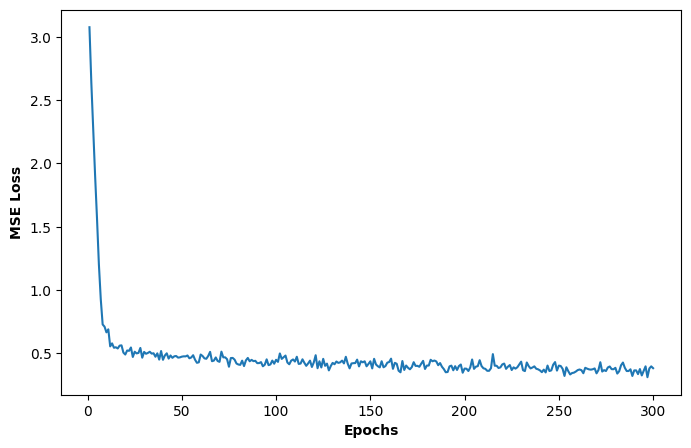

In [34]:
plt.figure(figsize = (8, 5))
plt.plot(df_loss_MAE['Epoch'], df_loss_MAE['Loss'])

# plt.title(f'Loss Function of {dataset} dataset')
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('MSE Loss', fontweight = 'bold')
# plt.legend(['Train Loss'])

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
plt.savefig(f'Loss_{dataset}_MAE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Loss (MSE)

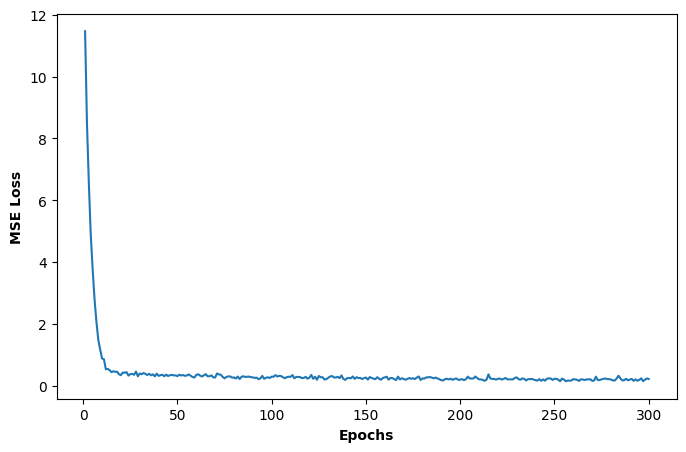

In [35]:
plt.figure(figsize = (8, 5))
plt.plot(df_loss_MSE['Epoch'], df_loss_MSE['Loss'])

# plt.title(f'Loss Function of {dataset} dataset')
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('MSE Loss', fontweight = 'bold')
# plt.legend(['Train Loss'])

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
plt.savefig(f'Loss_{dataset}_MSE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# 잔차 MAE

In [36]:
# df_outer_MAE['source'] = 'outer'
# df_egcn_MAE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MAE, df_egcn_MAE], ignore_index = True)

# # 잔차차
# residuals = df_combined['target'] - df_combined['pred']

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['pred'], residuals,
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 수평선 추가
# plt.axhline(0, color = 'grey', linestyle = '--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# plt.xlim(-10, 15)
# plt.ylim(-10, 10)
# plt.xlabel("Predicted Value")
# plt.ylabel("Residual")
# plt.title(f"Residual plot for {dataset} dataset")

# # 저장
# plt.savefig(f'result_{dataset}_residual_MAE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()